In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Top 100 Data

In [2]:
rankings = pd.read_pickle('../Resources/tennis_clean/atp_rankings.pkl')

In [3]:
players = pd.read_pickle('../Resources/tennis_clean/atp_players.pkl')

In [4]:
top_100_rankings = rankings.groupby('player_id').filter(lambda x: x.player_rank.min() <= 100)

In [5]:
top_100_rankings.index.unique().size

1140

In [6]:
top_100_rankings.info()
top_100_rankings.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579904 entries, 100011 to 206173
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   ranking_date    579904 non-null  datetime64[ns] 
 1   player_rank     579904 non-null  Int64          
 2   ranking_points  450130 non-null  Int64          
 3   player_age      579415 non-null  timedelta64[ns]
 4   best_rank       579904 non-null  Int64          
dtypes: Int64(3), datetime64[ns](1), timedelta64[ns](1)
memory usage: 44.3 MB


,ranking_date,player_rank,ranking_points,player_age,best_rank
player_id,,,,,
100011,1973-08-27,114,<NA>,14937 days,114
100011,1973-09-17,114,<NA>,14958 days,114
100011,1973-10-01,101,<NA>,14972 days,101
100011,1973-10-15,96,<NA>,14986 days,96
100011,1973-11-05,102,<NA>,15007 days,96


In [7]:
top_100 = top_100_rankings.index.unique()

In [8]:
top_100_players = players.loc[top_100]
top_100_players.head()

,name_first,name_last,hand,birthdate,country
player_id,,,,,
100011,Torben,Ulrich,L,1932-10-04,DEN
100016,Ken,Rosewall,R,1934-11-02,AUS
100022,Roy,Emerson,R,1936-11-03,AUS
100025,Barry,Phillips Moore,R,1937-07-09,AUS
100026,Andres,Gimeno,R,1937-08-03,ESP


In [9]:
top_100_players['best_rank'] = top_100_rankings.groupby('player_id').best_rank.min().values.astype(int)

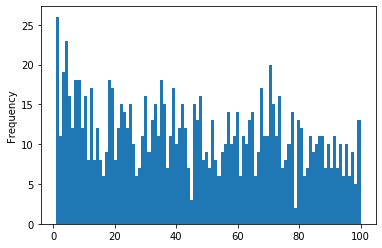

In [10]:
_ = top_100_players.best_rank.plot(kind='hist', bins=100)

In [11]:
top_100_rankings.to_pickle('../Resources/tennis_clean/atp_top_100_rankings.pkl')

In [12]:
top_100_players.to_pickle('../Resources/tennis_clean/atp_top_100_players.pkl')